### Partial Dependence Plots

- experiment with partial dependence plots for a tree-based ML algorithm
- use UCI heart disease dataset (https://www.kaggle.com/ronitf/heart-disease-uci)
- scikit-learn documentation (https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py)

In [1]:
#import packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
#read in and overview data
heart_df = pd.read_csv('./heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#separate features and target
X = heart_df.drop(['target'], axis=1)
y = heart_df['target']

In [5]:
#view feature stats
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
#view target distribution
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [7]:
#check feature and target shape
X.shape, y.shape

((303, 13), (303,))

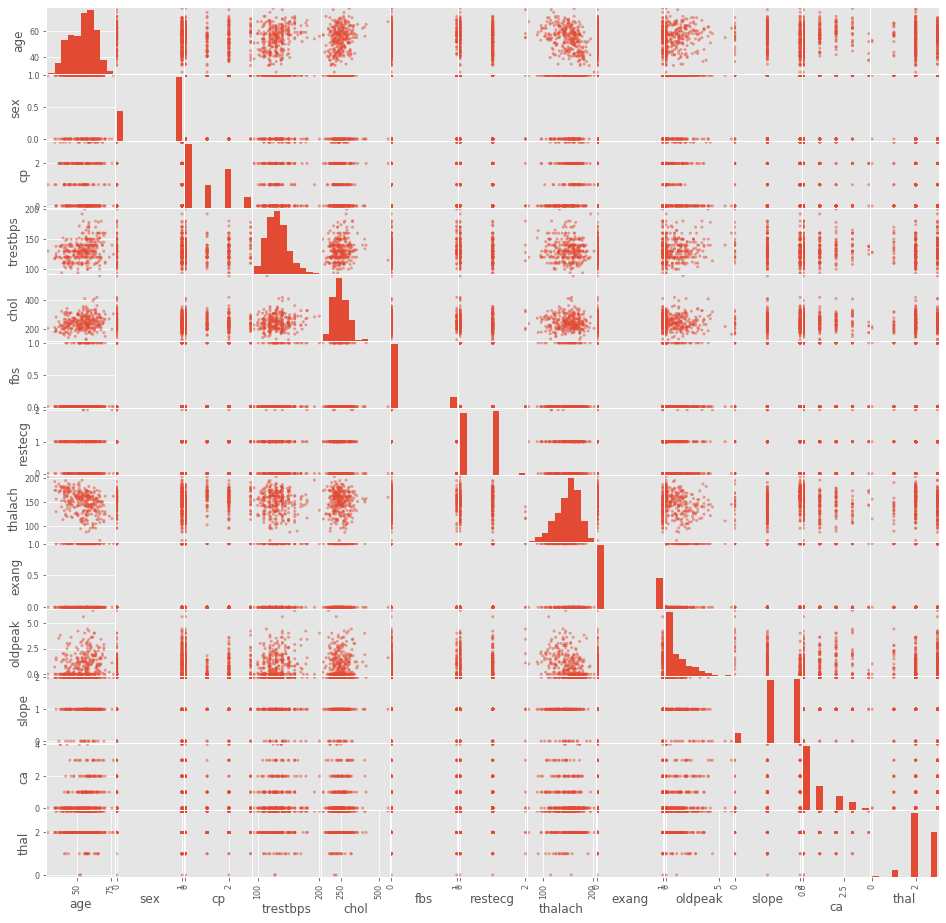

In [8]:
#plot feature scatter matrix
pd.plotting.scatter_matrix(X, figsize=(16,16));

In [9]:
#train random forest classifier on data
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
rf_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [10]:
#check model performance using roc_auc score
y_hat = rf_clf.predict(X)
y_hat_score = rf_clf.predict_proba(X)[:,1]
metrics.roc_auc_score(y, y_hat_score)

0.9494510320597277

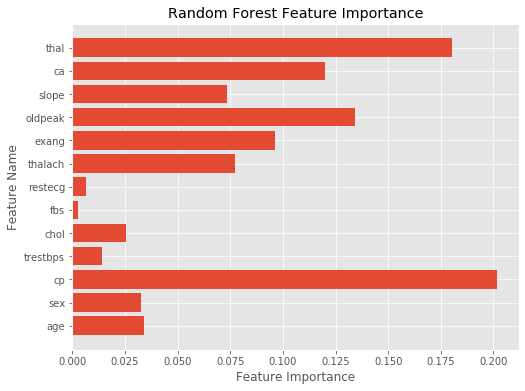

In [11]:
#plot feature importance
feat_imp = rf_clf.feature_importances_
features = list(X.columns)

plt.figure(figsize=(8,6))
plt.barh(range(len(feat_imp)), feat_imp)
plt.yticks(np.arange(len(feat_imp)), features)
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name');

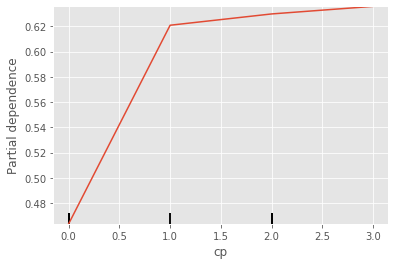

In [12]:
#plot pdp for feature with highest importance (cp)
fig = plt.figure(figsize=(6,4))
plot_partial_dependence(rf_clf, X, ['cp'], response_method='predict_proba', method='brute', 
                        percentiles=(0, 1), fig=fig);

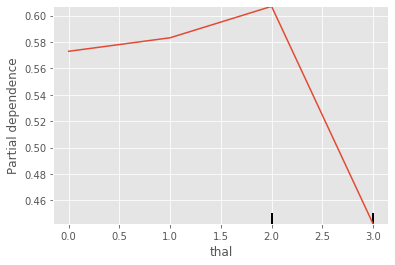

In [13]:
#plot pdp for feature with second highest importance (thal)
fig = plt.figure(figsize=(6,4))
plot_partial_dependence(rf_clf, X, ['thal'], percentiles=(0, 1), fig=fig);

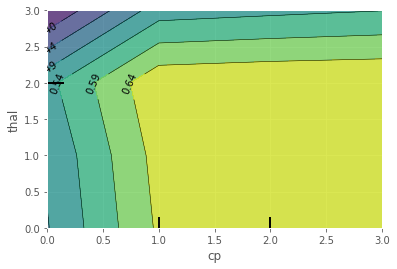

In [14]:
#plot pdp for interaction between cp and thal
fig = plt.figure(figsize=(6,4))
plot_partial_dependence(rf_clf, X, [('cp', 'thal')], response_method='predict_proba', method='brute', 
                        percentiles=(0, 1), fig=fig, n_jobs=-1);

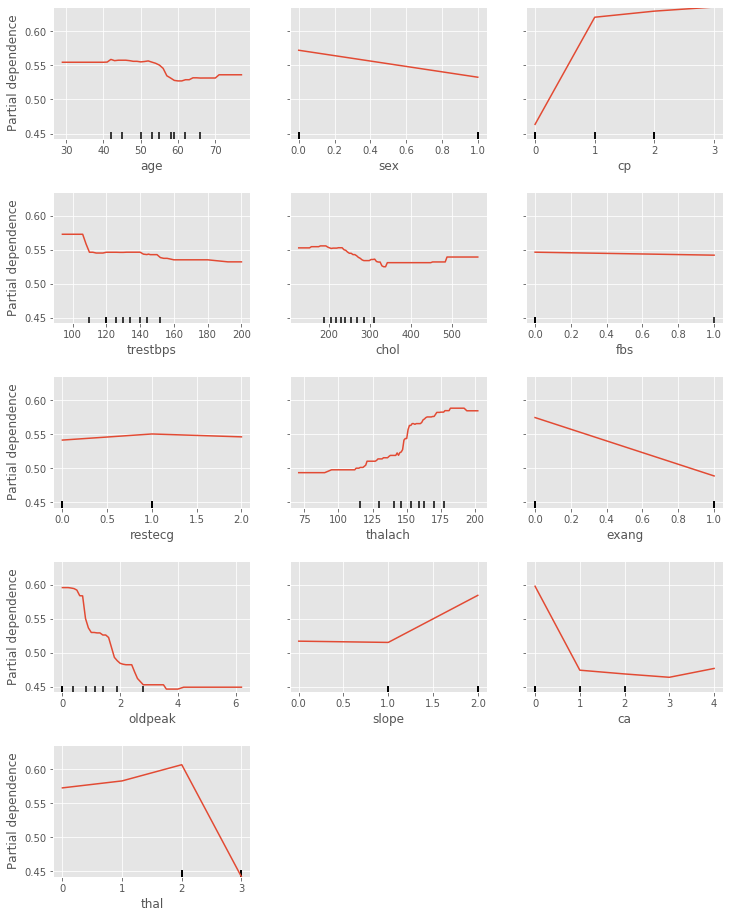

In [15]:
#plot pdp for all features
fig = plt.figure(figsize=(12,16))
plt.subplots_adjust(hspace=0.4)
plot_partial_dependence(rf_clf, X, features, response_method='predict_proba', method='brute', n_cols=3,
                        percentiles=(0, 1), fig=fig, n_jobs=-1);